In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data_path = "path to data"
data = pd.read_csv(data_path)
print(data.head())
data.info()

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB


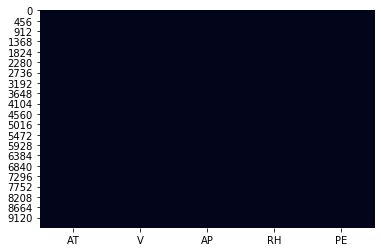

In [3]:
sns.heatmap(data.isnull(), cbar=False)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error


features = ["AT", "V", "AP", "RH"]
x = data[features]
y = data.PE

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

# instantiate linear regression model
LR = LinearRegression()
LR_model = LR.fit(x_train, y_train)

# evaluate the model
LR_model_prediction = LR_model.predict(x_test)

# calculate root mean square error of model
mse = mean_squared_error(y_test, LR_model_prediction)
rmse = np.sqrt(mse)

# calculate mean absolute error
mean_ae = mean_absolute_error(y_test, LR_model_prediction)

# calculate median absolute error
median_ae = median_absolute_error(y_test, LR_model_prediction)

print(f"RMSE: {round(rmse, 3)}")
print(f"Mean_AE: {round(mean_ae, 3)}")
print(f"Median_AE: {round(median_ae, 3)}")

RMSE: 4.541
Mean_AE: 3.527
Median_AE: 3.035


Decision Tree Regressor


In [20]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
DecisionTree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3) 
  
# fit the regressor with X and Y data
DecisionTree_model = DecisionTree.fit(x_train, y_train)

# evaluate the model
DecisionTree_model_prediction = DecisionTree_model.predict(x_test) 

# calculate root mean square error of model
DecisionTree_mse = mean_squared_error(y_test, DecisionTree_model_prediction)
DecisionTree_rmse = np.sqrt(DecisionTree_mse)

# calculate mean absolute error
DecisionTree_mean_ae = mean_absolute_error(y_test, DecisionTree_model_prediction)

# calculate median absolute error
DecisionTree_median_ae = median_absolute_error(y_test, DecisionTree_model_prediction)

print(f"RMSE: {round(DecisionTree_rmse, 3)}")
print(f"Mean_AE: {round(DecisionTree_mean_ae, 3)}")
print(f"Median_AE: {round(DecisionTree_median_ae, 3)}")

RMSE: 5.844
Mean_AE: 4.554
Median_AE: 3.842
